In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rqalpha.apis import *
from rqoptimizer import *
from rqoptimizer.utils import *
from rqdatac import *
from rqalpha_plus import run_func
import warnings
from functools import wraps
warnings.filterwarnings("ignore")
rqdatac.init()

In [46]:
df_etf = pd.read_excel('/Users/mistletoe/量化金融/5-PF/backtest/etf标的.xlsx')
etf_code = df_etf.code.values.tolist()
etf_code = [str(code) for code in etf_code]
df_etf = all_instruments(type='ETF' , market = 'cn')
df_etf = df_etf[df_etf.trading_code.isin(etf_code)]

In [47]:
symbol = df_etf.order_book_id.values.tolist()
start = "2019-01-01"
end = "2024-04-30"
frequency = "1d"
df1 = get_price(symbol, start, end, frequency)[['open','high','low','close']]
df1.head()

open   high    low  close
order_book_id date                                  
159507.XSHE   2023-06-21  1.058  1.060  1.010  1.024
              2023-06-26  1.009  1.020  0.989  0.993
              2023-06-27  0.993  1.014  0.990  1.010
              2023-06-28  1.008  1.008  0.963  0.983
              2023-06-29  0.980  1.004  0.980  1.001

In [48]:
df_price_entry = get_price(symbol, start, end, frequency)[['close']].unstack(level = 0)
df_price_entry.columns = df_price_entry.columns.droplevel(0)
df_price_entry.head()

order_book_id,159507.XSHE,159611.XSHE,159619.XSHE,159766.XSHE,159825.XSHE,159852.XSHE,159869.XSHE,159870.XSHE,159928.XSHE,159930.XSHE,...,512660.XSHG,512800.XSHG,512880.XSHG,512980.XSHG,513050.XSHG,515030.XSHG,515790.XSHG,515880.XSHG,516110.XSHG,561320.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4498,0.632,...,0.619,0.879,0.714,0.648,1.030,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4425,0.627,...,0.634,0.885,0.729,0.649,1.031,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4482,0.640,...,0.646,0.905,0.784,0.665,1.038,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4530,0.645,...,0.671,0.902,0.781,0.676,1.068,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4508,0.649,...,0.661,0.897,0.782,0.674,1.076,NaN,NaN,NaN,NaN,NaN


In [49]:
frequency_h = '60m'
df_price_exit = get_price(symbol, start, end, frequency_h)[['close']].unstack(level = 0)
df_price_exit.columns = df_price_exit.columns.droplevel(0)
df_price_exit.head()

order_book_id,159507.XSHE,159611.XSHE,159619.XSHE,159766.XSHE,159825.XSHE,159852.XSHE,159869.XSHE,159870.XSHE,159928.XSHE,159930.XSHE,...,512660.XSHG,512800.XSHG,512880.XSHG,512980.XSHG,513050.XSHG,515030.XSHG,515790.XSHG,515880.XSHG,516110.XSHG,561320.XSHG
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-02 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4532,0.648,...,0.618,0.878,0.711,0.656,1.038,NaN,NaN,NaN,NaN,NaN
2019-01-02 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4538,0.635,...,0.623,0.879,0.712,0.655,1.034,NaN,NaN,NaN,NaN,NaN
2019-01-02 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4515,0.630,...,0.617,0.874,0.711,0.648,1.029,NaN,NaN,NaN,NaN,NaN
2019-01-02 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4498,0.632,...,0.619,0.879,0.714,0.648,1.030,NaN,NaN,NaN,NaN,NaN
2019-01-03 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4460,0.632,...,0.638,0.885,0.737,0.652,1.037,NaN,NaN,NaN,NaN,NaN


2019-03-15 00:00:00: 买入 159930.XSHE, 价格 0.738, 数量 3300
2019-03-15 00:00:00: 买入 512800.XSHG, 价格 1.033, 数量 2400
2019-03-19 14:00:00: 卖出 159930.XSHE, 价格 0.757, 数量 3300
2019-03-25 10:30:00: 卖出 512800.XSHG, 价格 1.022, 数量 2400
2019-03-27 00:00:00: 买入 512010.XSHG, 价格 0.4142, 数量 6000
2019-03-29 00:00:00: 买入 512200.XSHG, 价格 0.94, 数量 2600
2019-03-29 00:00:00: 买入 512660.XSHG, 价格 0.8190000000000001, 数量 3100
2019-04-02 10:30:00: 卖出 512010.XSHG, 价格 0.4312, 数量 6000
2019-04-02 14:00:00: 卖出 512660.XSHG, 价格 0.8640000000000001, 数量 3100
2019-04-03 11:30:00: 卖出 512200.XSHG, 价格 0.986, 数量 2600
2019-04-16 00:00:00: 买入 512010.XSHG, 价格 0.4312, 数量 6000
2019-04-16 00:00:00: 买入 512400.XSHG, 价格 0.733, 数量 3500
2019-04-16 00:00:00: 买入 512660.XSHG, 价格 0.836, 数量 3100
2019-04-16 00:00:00: 买入 512880.XSHG, 价格 1.082, 数量 2400
2019-04-18 11:30:00: 卖出 512400.XSHG, 价格 0.723, 数量 3500
2019-04-18 14:00:00: 卖出 512880.XSHG, 价格 1.069, 数量 2400
2019-04-19 00:00:00: 买入 512880.XSHG, 价格 1.08, 数量 2300
2019-04-22 10:30:00: 卖出 512010.XSHG, 价

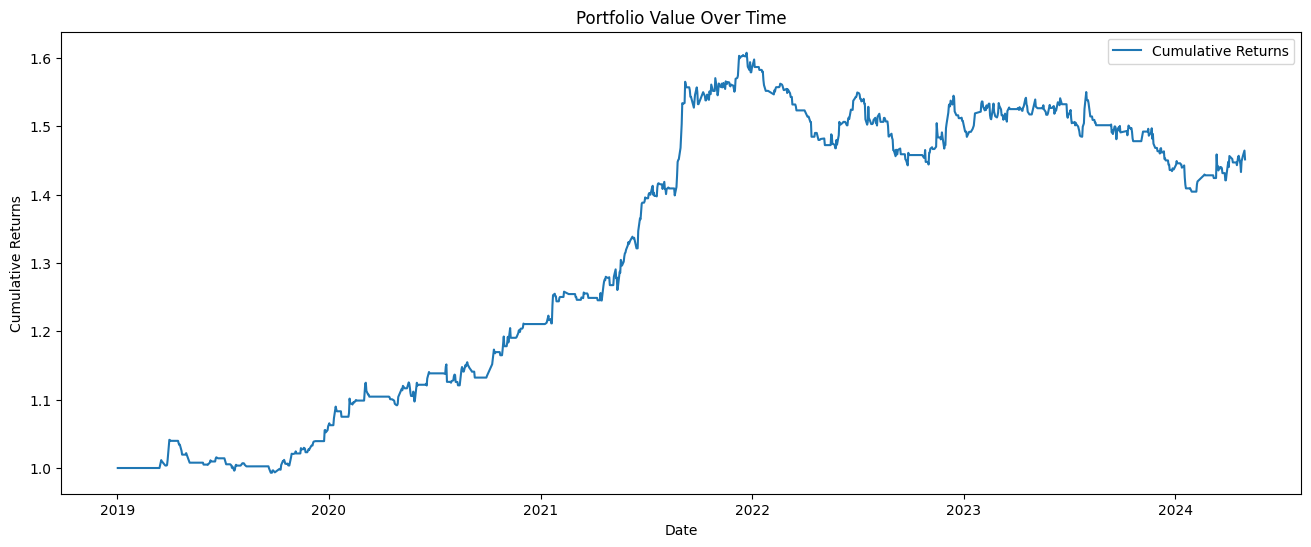

初始资金: 10000
最终资金: 14514.529999999995
年化收益率: 7.48%
最大回撤: -12.64%
未考虑无风险利率的夏普比率: 1.04
交易次数: 928


In [65]:
df = df_price_entry.copy()
count = 0
initial_capital = 10000
positions = 4
slippage_and_fees = 0.00  # 滑点
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {etf: 0 for etf in df.columns} 
peak = {etf: 0 for etf in df.columns}
# 初始止损位和止盈位
stop_loss_point = {etf: 0 for etf in df.columns}
take_profit_point = {etf: 0 for etf in df.columns}
entry_price = {etf: 0 for etf in df.columns}

# 突破60日均线 + 斜率
def check_buy_signals(etf, price_data_daily, current_date, start_date):
    if len(price_data_daily) < 20 or current_date < start_date + pd.Timedelta(days=20):
        return False
    ma50 = price_data_daily[-20:].mean()
    yesterday_close = price_data_daily[-2]
    today_close = price_data_daily[-1]
    slope_positive = np.polyfit(range(20), price_data_daily[-20:], 1)[0] > 0
    if yesterday_close < ma50 and today_close >= ma50 and slope_positive:
        return True
    
    # if yesterday_close < ma50 and today_close >= ma50:
    #     return True
    return False

def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings[etf] == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.99
            take_profit_point[etf] = price * 1.02
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price):
    global stop_loss_point, take_profit_point

    if holdings[etf] <= 0:
        return False
    if price < stop_loss_point[etf]:
        return True

    if price >= take_profit_point[etf]:
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False


def sell(etf, price, date):
    global capital, cash, etf_value, holdings,count
    if not np.isnan(price) and holdings[etf] > 0:
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count+=1

start_date = pd.to_datetime('2014-01-02')
# 主循环 循环df_price_entry和df_price_exit
trading_hours = ['10:30', '11:30', '14:00', '15:00']
for date, prices_daily in df.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]

            # 循环 df_price_exit小时线数据找准时机出场
            for etf in prices_daily.index:
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    if check_stop_conditions(etf, price_hourly):
                        sell(etf, price_hourly, datetime_index)
    
    # 循环 df_price_entry 日线数据卖出
    for etf in prices_daily.index:
        price_data_daily = df[etf].loc[:date]
        if check_buy_signals(etf, price_data_daily, date, start_date):
            num_held_etfs = sum(1 for h in holdings.values() if h > 0)
            if num_held_etfs < positions:
                buy(etf, prices_daily[etf], date)
    etf_value = sum(holdings[etf] * prices_daily[etf] for etf in prices_daily.index if holdings[etf] > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

# 年化收益率
annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")

In [52]:
n1 = portfolio_values

2019-03-15 00:00:00: 买入 159930.XSHE, 价格 0.738, 数量 3300
2019-03-15 00:00:00: 买入 512800.XSHG, 价格 1.033, 数量 2400
2019-03-18 00:00:00: 更新 159930.XSHE 止盈点为 0.76
2019-03-18 00:00:00: 卖出 159930.XSHE, 价格 0.76, 数量 3300
2019-03-18 00:00:00: 买入 159930.XSHE, 价格 0.76, 数量 3300
2019-03-20 14:00:00: 卖出 159930.XSHE, 价格 0.7509999999999999, 数量 3300
2019-03-25 10:30:00: 卖出 512800.XSHG, 价格 1.022, 数量 2400
2019-03-27 00:00:00: 买入 512010.XSHG, 价格 0.4142, 数量 6000
2019-03-29 00:00:00: 更新 512010.XSHG 止盈点为 0.4225
2019-03-29 00:00:00: 卖出 512010.XSHG, 价格 0.4225, 数量 6000
2019-03-29 00:00:00: 买入 512200.XSHG, 价格 0.94, 数量 2600
2019-03-29 00:00:00: 买入 512660.XSHG, 价格 0.8190000000000001, 数量 3100
2019-04-01 00:00:00: 更新 512200.XSHG 止盈点为 0.981
2019-04-01 00:00:00: 卖出 512200.XSHG, 价格 0.981, 数量 2600
2019-04-01 00:00:00: 更新 512660.XSHG 止盈点为 0.853
2019-04-01 00:00:00: 卖出 512660.XSHG, 价格 0.853, 数量 3100
2019-04-16 00:00:00: 买入 512010.XSHG, 价格 0.4312, 数量 5900
2019-04-16 00:00:00: 买入 512400.XSHG, 价格 0.733, 数量 3500
2019-04-16 00:00

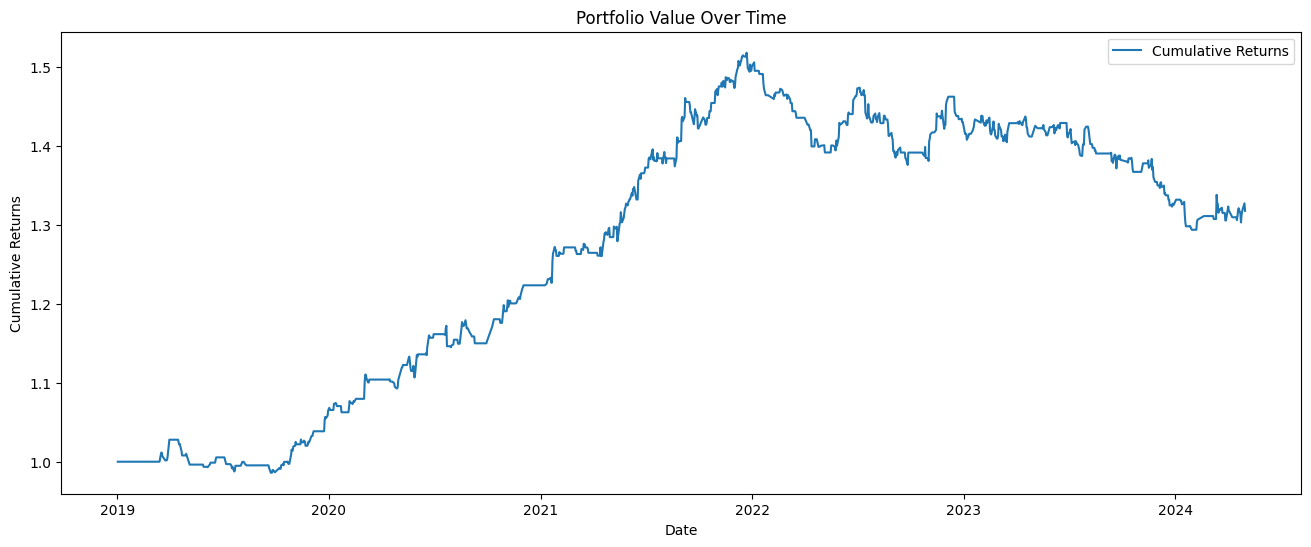

初始资金: 10000
最终资金: 13173.720000000018
年化收益率: 5.48%
最大回撤: -14.76%
未考虑无风险利率的夏普比率: 0.86
交易次数: 994


In [53]:
df = df_price_entry.copy()
count = 0
initial_capital = 10000
positions = 4
slippage_and_fees = 0.00  # 滑点
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {etf: 0 for etf in df.columns} 
peak = {etf: 0 for etf in df.columns}
# 初始止损位和止盈位
stop_loss_point = {etf: 0 for etf in df.columns}
take_profit_point = {etf: 0 for etf in df.columns}
entry_price = {etf: 0 for etf in df.columns}
# 突破60日均线 + 斜率
def check_buy_signals(etf, price_data_daily, current_date, start_date):
    if len(price_data_daily) < 20 or current_date < start_date + pd.Timedelta(days=20):
        return False
    ma50 = price_data_daily[-20:].mean()
    yesterday_close = price_data_daily[-2]
    today_close = price_data_daily[-1]
    slope_positive = np.polyfit(range(20), price_data_daily[-20:], 1)[0] > 0
    if yesterday_close < ma50 and today_close >= ma50 and slope_positive:
        return True
    
    # if yesterday_close < ma50 and today_close >= ma50:
    #     return True
    return False

def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings[etf] == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.99
            take_profit_point[etf] = price * 1.02
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price):
    global stop_loss_point, take_profit_point

    if holdings[etf] <= 0:
        return False
    if price < stop_loss_point[etf]:
        return True

    if price >= take_profit_point[etf]:
        print(f"{date}: 更新 {etf} 止盈点为 {price}")
        sell(etf, price, date, portion=0.5)
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False

def sell(etf, price, date, portion = 1):
    global capital, cash, etf_value, holdings,count
    if not np.isnan(price) and holdings[etf] > 0:
        sell_amount = int(holdings[etf] * portion)
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count+=1

start_date = pd.to_datetime('2014-01-02')
# 主循环 循环df_price_entry和df_price_exit
trading_hours = ['10:30', '11:30', '14:00', '15:00']
for date, prices_daily in df.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]

            # 循环 df_price_exit小时线数据找准时机出场
            for etf in prices_daily.index:
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    if check_stop_conditions(etf, price_hourly):
                        sell(etf, price_hourly, datetime_index)
    
    # 循环 df_price_entry 日线数据卖出
    for etf in prices_daily.index:
        price_data_daily = df[etf].loc[:date]
        if check_buy_signals(etf, price_data_daily, date, start_date):
            num_held_etfs = sum(1 for h in holdings.values() if h > 0)
            if num_held_etfs < positions:
                buy(etf, prices_daily[etf], date)
    etf_value = sum(holdings[etf] * prices_daily[etf] for etf in prices_daily.index if holdings[etf] > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

# 年化收益率
annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")

In [54]:
n2 = portfolio_values

In [63]:
price = [1, 2, 3, 4, 5]
price[-2:]

[4, 5]

In [64]:
price[-3:-1]

[3, 4]

2019-05-07 00:00:00: 买入 512010.XSHG, 价格 0.4088, 数量 12200
2019-05-09 10:30:00: 卖出 512010.XSHG, 价格 0.3958, 数量 12200
2019-05-10 00:00:00: 买入 513050.XSHG, 价格 1.275, 数量 3800
2019-05-15 00:00:00: 买入 512010.XSHG, 价格 0.4085, 数量 12200
2019-05-20 10:30:00: 卖出 512010.XSHG, 价格 0.3915, 数量 12200
2019-05-20 10:30:00: 卖出 513050.XSHG, 价格 1.209, 数量 3800
2019-06-10 00:00:00: 买入 159928.XSHE, 价格 0.6705, 数量 6900
2019-06-20 14:00:00: 卖出 159928.XSHE, 价格 0.706, 数量 6900
2019-07-19 00:00:00: 买入 512400.XSHG, 价格 0.653, 数量 7300
2019-08-08 00:00:00: 买入 512010.XSHG, 价格 0.4022, 数量 12000
2019-08-26 14:00:00: 卖出 512010.XSHG, 价格 0.442, 数量 12000
2019-08-27 00:00:00: 买入 513050.XSHG, 价格 1.198, 数量 4400
2019-09-05 15:00:00: 卖出 512400.XSHG, 价格 0.69, 数量 7300
2019-09-16 10:30:00: 卖出 513050.XSHG, 价格 1.263, 数量 4400
2019-09-27 00:00:00: 买入 159928.XSHE, 价格 0.7338, 数量 7200
2019-09-27 00:00:00: 买入 512880.XSHG, 价格 0.9620000000000001, 数量 5500
2019-10-09 10:30:00: 卖出 512880.XSHG, 价格 0.93, 数量 5500
2019-10-11 00:00:00: 买入 159930.XSHE, 价格 0

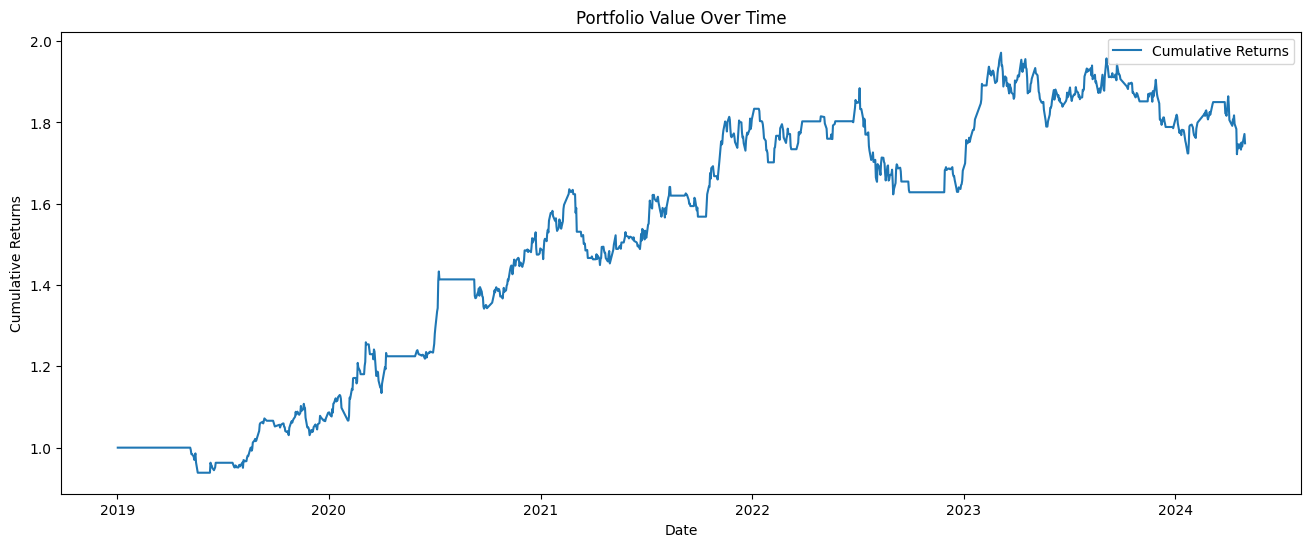

初始资金: 10000
最终资金: 17487.039999999997
年化收益率: 11.42%
最大回撤: -13.86%
未考虑无风险利率的夏普比率: 0.86
交易次数: 232


In [55]:
df = df_price_entry.copy()
count = 0
initial_capital = 10000
positions = 2
slippage_and_fees = 0.00  # 滑点
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {etf: 0 for etf in df.columns} 
peak = {etf: 0 for etf in df.columns}
# 初始止损位和止盈位
stop_loss_point = {etf: 0 for etf in df.columns}
take_profit_point = {etf: 0 for etf in df.columns}
entry_price = {etf: 0 for etf in df.columns}

# 突破60日均线 + 斜率
def check_buy_signals(etf, price_data_daily, current_date, start_date):
    if len(price_data_daily) < 60 or current_date < start_date + pd.Timedelta(days=60):
        return False
    ma50 = price_data_daily[-60:].mean()
    yesterday_close = price_data_daily[-2]
    today_close = price_data_daily[-1]
    slope_positive = np.polyfit(range(60), price_data_daily[-60:], 1)[0] > 0
    if yesterday_close < ma50 and today_close >= ma50 and slope_positive:
        return True
    
    # if yesterday_close < ma50 and today_close >= ma50:
    #     return True
    return False

def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings[etf] == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.97
            take_profit_point[etf] = price * 1.06
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price):
    global stop_loss_point, take_profit_point

    if holdings[etf] <= 0:
        return False
    if price < stop_loss_point[etf]:
        return True

    if price >= take_profit_point[etf]:
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False


def sell(etf, price, date):
    global capital, cash, etf_value, holdings,count
    if not np.isnan(price) and holdings[etf] > 0:
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count+=1

start_date = pd.to_datetime('2014-01-02')
# 主循环 循环df_price_entry和df_price_exit
trading_hours = ['10:30', '11:30', '14:00', '15:00']
for date, prices_daily in df.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]

            # 循环 df_price_exit小时线数据找准时机出场
            for etf in prices_daily.index:
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    if check_stop_conditions(etf, price_hourly):
                        sell(etf, price_hourly, datetime_index)
    
    # 循环 df_price_entry 日线数据卖出
    for etf in prices_daily.index:
        price_data_daily = df[etf].loc[:date]
        if check_buy_signals(etf, price_data_daily, date, start_date):
            num_held_etfs = sum(1 for h in holdings.values() if h > 0)
            if num_held_etfs < positions:
                buy(etf, prices_daily[etf], date)
    etf_value = sum(holdings[etf] * prices_daily[etf] for etf in prices_daily.index if holdings[etf] > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

# 年化收益率
annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")

In [56]:
n3 = portfolio_values

2019-05-07 00:00:00: 买入 512010.XSHG, 价格 0.4088, 数量 12200
2019-05-09 10:30:00: 卖出 512010.XSHG, 价格 0.3958, 数量 12200
2019-05-10 00:00:00: 买入 513050.XSHG, 价格 1.275, 数量 3800
2019-05-15 00:00:00: 买入 512010.XSHG, 价格 0.4085, 数量 12200
2019-05-20 10:30:00: 卖出 512010.XSHG, 价格 0.3915, 数量 12200
2019-05-20 10:30:00: 卖出 513050.XSHG, 价格 1.209, 数量 3800
2019-06-10 00:00:00: 买入 159928.XSHE, 价格 0.6705, 数量 6900
2019-06-20 00:00:00: 更新 159928.XSHE 止盈点为 0.7122
2019-06-20 00:00:00: 卖出 159928.XSHE, 价格 0.7122, 数量 6900
2019-07-19 00:00:00: 买入 512400.XSHG, 价格 0.653, 数量 7400
2019-08-08 00:00:00: 买入 512010.XSHG, 价格 0.4022, 数量 12000
2019-08-23 00:00:00: 更新 512010.XSHG 止盈点为 0.4338
2019-08-23 00:00:00: 卖出 512010.XSHG, 价格 0.4338, 数量 12000
2019-08-27 00:00:00: 买入 513050.XSHG, 价格 1.198, 数量 4300
2019-09-05 00:00:00: 更新 512400.XSHG 止盈点为 0.6940000000000001
2019-09-05 00:00:00: 卖出 512400.XSHG, 价格 0.6940000000000001, 数量 7400
2019-09-12 00:00:00: 更新 513050.XSHG 止盈点为 1.271
2019-09-12 00:00:00: 卖出 513050.XSHG, 价格 1.271, 数量 4300


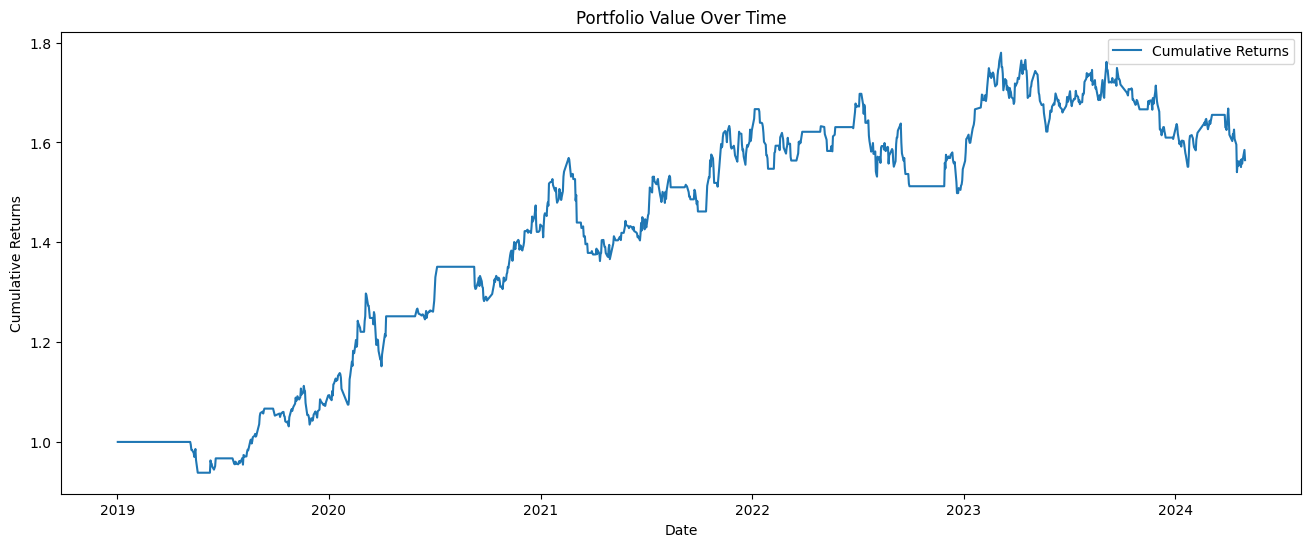

初始资金: 10000
最终资金: 15644.750000000016
年化收益率: 9.05%
最大回撤: -13.44%
未考虑无风险利率的夏普比率: 0.70
交易次数: 238


In [57]:
df = df_price_entry.copy()
count = 0
initial_capital = 10000
positions = 2
slippage_and_fees = 0.00  # 滑点
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {etf: 0 for etf in df.columns} 
peak = {etf: 0 for etf in df.columns}
# 初始止损位和止盈位
stop_loss_point = {etf: 0 for etf in df.columns}
take_profit_point = {etf: 0 for etf in df.columns}
entry_price = {etf: 0 for etf in df.columns}

# 突破60日均线 + 斜率
def check_buy_signals(etf, price_data_daily, current_date, start_date):
    if len(price_data_daily) < 60 or current_date < start_date + pd.Timedelta(days=60):
        return False
    ma50 = price_data_daily[-60:].mean()
    yesterday_close = price_data_daily[-2]
    today_close = price_data_daily[-1]
    slope_positive = np.polyfit(range(60), price_data_daily[-60:], 1)[0] > 0
    if yesterday_close < ma50 and today_close >= ma50 and slope_positive:
        return True
    
    # if yesterday_close < ma50 and today_close >= ma50:
    #     return True
    return False

def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings[etf] == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.97
            take_profit_point[etf] = price * 1.06
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price):
    global stop_loss_point, take_profit_point

    if holdings[etf] <= 0:
        return False
    if price < stop_loss_point[etf]:
        return True

    if price >= take_profit_point[etf]:
        print(f"{date}: 更新 {etf} 止盈点为 {price}")
        sell(etf, price, date, portion=0.5)
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False

def sell(etf, price, date, portion = 1):
    global capital, cash, etf_value, holdings,count
    if not np.isnan(price) and holdings[etf] > 0:
        sell_amount = int(holdings[etf] * portion)
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count+=1

start_date = pd.to_datetime('2014-01-02')
# 主循环 循环df_price_entry和df_price_exit
trading_hours = ['10:30', '11:30', '14:00', '15:00']
for date, prices_daily in df.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]

            # 循环 df_price_exit小时线数据找准时机出场
            for etf in prices_daily.index:
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    if check_stop_conditions(etf, price_hourly):
                        sell(etf, price_hourly, datetime_index)
    
    # 循环 df_price_entry 日线数据卖出
    for etf in prices_daily.index:
        price_data_daily = df[etf].loc[:date]
        if check_buy_signals(etf, price_data_daily, date, start_date):
            num_held_etfs = sum(1 for h in holdings.values() if h > 0)
            if num_held_etfs < positions:
                buy(etf, prices_daily[etf], date)
    etf_value = sum(holdings[etf] * prices_daily[etf] for etf in prices_daily.index if holdings[etf] > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

# 年化收益率
annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")

In [58]:
n4 = portfolio_values

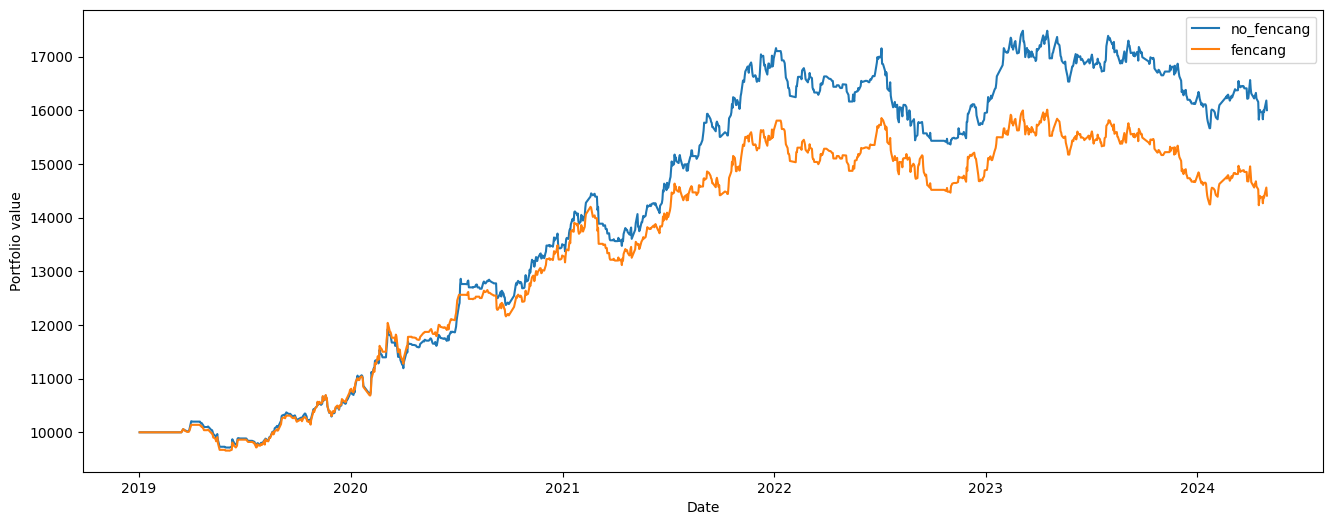

In [60]:
equity_value = (n1 + n3)/2
equity_value2 = (n2 + n4)/2

plt.figure(figsize=(16, 6))
plt.plot(df_price_entry.index, equity_value, label='no_fencang')
plt.plot(df_price_entry.index, equity_value2, label='fencang')

plt.xlabel('Date')
plt.ylabel('Portfolio value')
plt.legend()
plt.show()


In [7]:
import rqdatac
rqdatac.init()
df = rqdatac.get_price(
    order_book_ids='516970.XSHG',
    start_date='2024-01-01',
    end_date='2024-06-03',
    frequency='1d'
)[['close']]

/Users/mistletoe/miniconda3/envs/examples/lib/python3.11/site-packages/rqdatac/client.py:206: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)
/Users/mistletoe/miniconda3/envs/examples/lib/python3.11/site-packages/rqdatac/client.py:245: UserWarning: Your account will be expired after  24 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "


In [8]:
df

close
order_book_id date             
516970.XSHG   2024-01-02  0.982
              2024-01-03  0.993
              2024-01-04  0.985
              2024-01-05  0.983
              2024-01-08  0.964
...                         ...
              2024-05-28  1.067
              2024-05-29  1.065
              2024-05-30  1.057
              2024-05-31  1.057
              2024-06-03  1.051

[99 rows x 1 columns]

In [9]:
series = df['close'].values
series

array([0.982, 0.993, 0.985, 0.983, 0.964, 0.971, 0.962, 0.964, 0.968,
       0.974, 0.97 , 0.952, 0.944, 0.942, 0.909, 0.916, 0.965, 1.02 ,
       1.035, 1.032, 1.019, 1.001, 0.973, 0.968, 0.926, 0.964, 0.99 ,
       0.99 , 1.   , 1.002, 1.02 , 1.023, 1.03 , 1.011, 1.023, 1.014,
       1.028, 1.03 , 1.018, 1.026, 1.022, 1.018, 1.026, 1.032, 1.026,
       1.018, 1.027, 1.026, 1.046, 1.036, 1.039, 1.035, 1.019, 1.018,
       1.022, 1.007, 1.013, 1.027, 1.047, 1.041, 1.044, 1.039, 1.026,
       1.014, 1.026, 1.014, 1.062, 1.041, 1.074, 1.072, 1.076, 1.064,
       1.039, 1.05 , 1.05 , 1.057, 1.063, 1.042, 1.056, 1.056, 1.044,
       1.061, 1.069, 1.079, 1.078, 1.069, 1.082, 1.1  , 1.097, 1.089,
       1.099, 1.076, 1.069, 1.077, 1.067, 1.065, 1.057, 1.057, 1.051])

In [10]:
series[-50:].mean()

1.0531